In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_data=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [4]:
df=train_data
df1=test_data

In [5]:
test_data['id'].shape

(3263,)

In [6]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

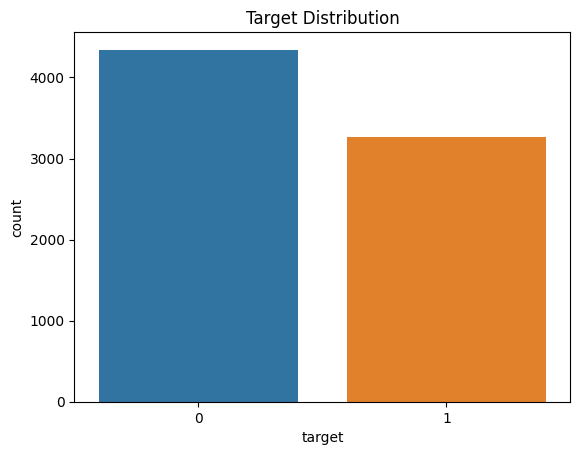

In [9]:
sns.countplot(x='target',data=df)
plt.title('Target Distribution')

In [10]:
df=df.drop(["keyword","location"],axis=1)
df.head(5)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:

import spacy

In [12]:
df.head(5)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df.shape

(7613, 3)

In [14]:
nlp=spacy.load('en_core_web_sm')

In [15]:
def preprocess(text):
    doc=nlp(text)
    filtered_token=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return ' '.join(filtered_token)
       
    

In [16]:
df['Preprocessed_data']=df['text'].apply(preprocess)

In [17]:
df.head(5)


,id,text,target,Preprocessed_data
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed Reason earthquake ALLAH forgive
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got send photo Ruby Alaska smoke wildfire pour...


In [18]:
#df['vector']=df['Preprocessed_data'].apply(lambda text: nlp(text).vector)

In [19]:
#df.head(4)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Preprocessed_data, df.target, test_size=0.2 , random_state=42)


In [21]:
#x_train.shape

In [22]:
#x_train_2d.shape

In [23]:
#from sklearn.tree import DecisionTreeClassifier
#clf=DecisionTreeClassifier()
#clf.fit(x_train_2d, y_train)

In [24]:
#prediction =clf.predict(x_test_2d)



In [25]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#print(classification_report(y_test,prediction))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf=Pipeline([
    ('vectorize_n_grams',CountVectorizer(ngram_range=(1,3))),
    ('KNN',KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])
clf.fit(x_train, y_train)
prediction =clf.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       874
           1       0.83      0.41      0.55       649

    accuracy                           0.71      1523
   macro avg       0.76      0.67      0.67      1523
weighted avg       0.75      0.71      0.69      1523



In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf=Pipeline([
    ('vectorize_n_grams',CountVectorizer(ngram_range=(1,3))),
    ('KNN',KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])
clf.fit(x_train, y_train)
prediction =clf.predict(x_test)
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       874
           1       1.00      0.13      0.23       649

    accuracy                           0.63      1523
   macro avg       0.80      0.57      0.49      1523
weighted avg       0.77      0.63      0.53      1523



In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=Pipeline([
    ('vectorize_n_grams',CountVectorizer(ngram_range=(1,3))),
    ('random_forest',(RandomForestClassifier()))
])
clf.fit(x_train, y_train)
prediction =clf.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       874
           1       0.91      0.53      0.67       649

    accuracy                           0.78      1523
   macro avg       0.82      0.74      0.75      1523
weighted avg       0.81      0.78      0.76      1523



In [29]:
from sklearn.naive_bayes import MultinomialNB
clf1 = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),         
     ('Multi NB', MultinomialNB(alpha = 0.75))         
])
clf1.fit(x_train, y_train)
prediction =clf1.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       874
           1       0.76      0.74      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.79      0.79      0.79      1523



In [30]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#scaler_train_embed=scaler.fit_transform(x_train_2d)
#scaler_test_embed=scaler.fit_transform(x_test_2d)
#clf=MultinomialNB()
#clf.fit(scaler_train_embed,y_train)
#pediction =clf.predict(scaler_test_embed)
#print(classification_report(y_test,prediction))

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf=Pipeline([
    ('vectorize_n_grams',CountVectorizer(ngram_range=(1,3))),
    ('gradiantboost',(GradientBoostingClassifier()))
])
clf.fit(x_train, y_train)
prediction =clf.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       874
           1       0.86      0.53      0.66       649

    accuracy                           0.76      1523
   macro avg       0.79      0.73      0.74      1523
weighted avg       0.78      0.76      0.75      1523



In [32]:
#from sklearn.linear_model import LogisticRegression
#clf1=LogisticRegression(random_state=0)
#clf1.fit(x_train_2d, y_train)
#prediction =clf1.predict(x_test_2d)
#print(classification_report(y_test,prediction))

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[817,  57],
       [305, 344]])

Text(58.222222222222214, 0.5, 'Truth')

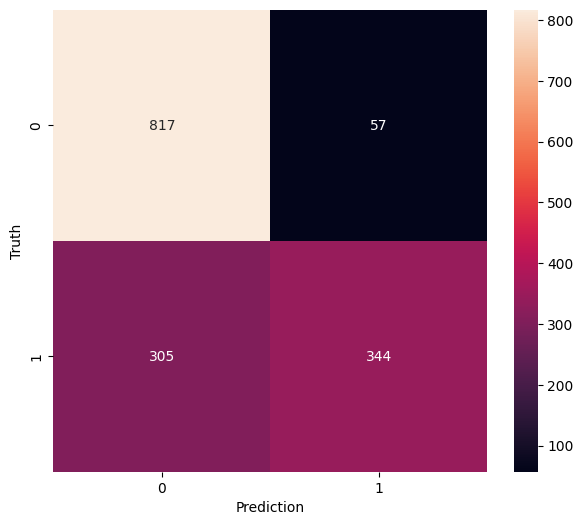

In [34]:
plt.figure(figsize=(7,6))
sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [35]:
test_data['id'].shape

(3263,)

In [36]:
x_test.shape

(1523,)

In [37]:

X_test=df1['text']


In [38]:
#X_test1=np.stack(X_test)


In [39]:
y_prediction=clf1.predict(X_test)

In [40]:
Submission = pd.DataFrame({'id' : df1['id'],'target':y_prediction})
Submission.to_csv('Submission.csv',index=False)
